# Rescheduling mit Flow Time
> Planunghorizont Tag 0: 2 Tage
> Rescheduling des Tages 1

In [1]:
# Datenzugriff
from configs.config import get_path

# Utils
import src.utils.presenter as show
from src.utils.production_process import convert
from src.utils.production_process import initialize as init
from src.utils.analize import check_constrains as check

from src.utils.production_process import time_determination as term

# Solver Model
from src.models.lp import flowtime as lp_flowtime

# Simulation
from src.simulation.ProductionDaySimulation import ProductionDaySimulation

# Extern
import pandas as pd
pd.set_option('display.min_rows', 16)
pd.set_option('display.max_rows', 21)

In [2]:
max_time = 60*6 # 6min

In [3]:
basic_data_path = get_path("data", "basic")

df_instance = pd.read_csv(basic_data_path / "instance.csv")
df_instance

,Production_Plan_ID,Operation,Machine,Processing Time
0,0,0,M00,29
1,0,1,M01,78
2,0,2,M02,9
3,0,3,M03,36
4,0,4,M04,49
5,0,5,M05,11
6,0,6,M06,62
7,0,7,M07,56
...,...,...,...,...
92,9,2,M02,61


## 1) Aufträge generieren für 1 Tag

In [4]:
day_count = 1

df_jssp, df_job_times = init.create_production_orders_for_shifts(
    df_template=df_instance,
    shift_count=day_count,
    shift_length=1440,
    shuffle=True,
    job_seed=40,
    arrival_seed=80
)
df_job_times

,Job,Production_Plan_ID,Arrival
0,0,0,51
1,1,1,136
2,2,2,158
3,3,3,236
4,4,4,404
5,5,5,485
6,6,6,501
7,7,7,528
8,8,8,550
9,9,9,559


In [5]:
df_jssp

,Job,Production_Plan_ID,Operation,Machine,Processing Time
0,0,0,0,M00,29
1,0,0,1,M01,78
2,0,0,2,M02,9
3,0,0,3,M03,36
4,0,0,4,M04,49
5,0,0,5,M05,11
6,0,0,6,M06,62
7,0,0,7,M07,56
...,...,...,...,...,...
172,17,3,2,M00,71


## I) Complete Scheduling

In [6]:
# Scheduling
df_schedule = lp_flowtime.solve_jssp(df_jssp, df_job_times, solver= "HiGHS", var_cat="Integer", msg=False, timeLimit=max_time, gapRel= 0.05)
df_schedule

BigM: 11000

Solver-Informationen:
  Summe Flow Times        : 11748.0
  Solver-Status           : Optimal
  Anzahl Variablen        : 1728
  Anzahl Constraints      : 3240
  Laufzeit                : ~360.27 Sekunden


,Job,Operation,Arrival,Machine,Start,Processing Time,Flow time,End
0,0,0,51,M00,51.0,29.0,29.0,80.0
1,0,1,51,M01,80.0,78.0,107.0,158.0
2,1,0,136,M00,136.0,43.0,43.0,179.0
3,0,2,51,M02,158.0,9.0,116.0,167.0
4,2,0,158,M01,158.0,91.0,91.0,249.0
5,0,3,51,M03,167.0,36.0,152.0,203.0
6,1,1,136,M02,179.0,90.0,133.0,269.0
7,0,4,51,M04,203.0,49.0,201.0,252.0
...,...,...,...,...,...,...,...,...
172,16,8,1310,M07,1903.0,72.0,665.0,1975.0


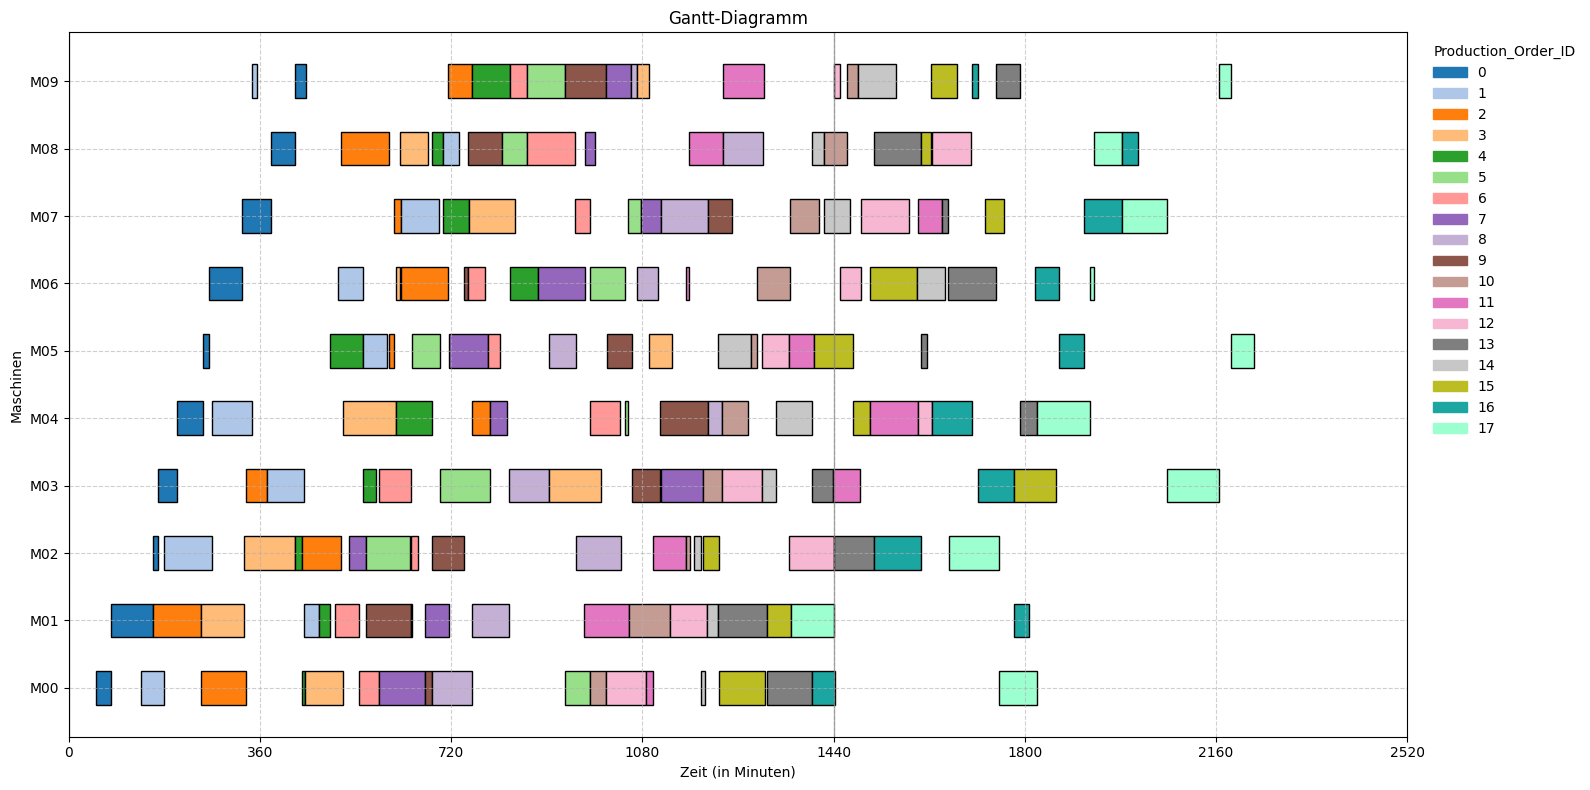

+ Keine Maschinenkonflikte gefunden
+ Alle Gruppen wurden in korrekter Operationsreihenfolge ausgeführt.
+ Alle technologischen Abhängigkeiten wurden eingehalten.
+ Alle Operation starten erst nach Arrival des Job


True

In [7]:
show.plot_gantt(df_schedule, perspective="Machine")
check.is_machine_conflict_free(df_schedule)
check.is_operation_sequence_correct(df_schedule)
check.is_job_timing_correct(df_schedule)
check.is_start_correct(df_schedule)

In [ ]:
-

## II) Erster Tag (Tag 0)

### a) Simulation

In [ ]:
day_length = 1440

In [ ]:
day_numb = 0

day_start = day_length*day_numb 
day_end = day_start + day_length

In [ ]:
simulation = ProductionDaySimulation(df_plan, vc=0.25)
df_execution = simulation.run(start_time = day_start, end_time=day_end)

In [ ]:
# Schritt 1: Relevante Spalten aus df_execution
executed_keys = df_execution[[ "Job", "Operation" ]].drop_duplicates()

# Schritt 2: Negative Merge – finde alle, die NICHT ausgeführt wurden
df_plan_undone = df_schedule.merge(
    executed_keys,
    on=["Job", "Operation"],
    how="left",
    indicator=True
)


# Schritt 3: Nur die Zeilen behalten, die NICHT in df_execution waren
df_plan_undone = df_plan_undone[df_plan_undone["_merge"] == "left_only"].drop(columns="_merge").reset_index(drop=True)
df_plan_undone

In [ ]:
if not df_execution.empty:
    show.plot_gantt_machines(df_execution, title=f"Gantt-Diagramm ab Tag {day_numb}", duration_column="Simulated Processing Time")
else:
    print(f"Nothing executed on day {day_numb}")

### b) Verbleibene Jobs (Rest)

In [ ]:
df_rest = df_plan.merge(df_execution[["Job", "Machine"]], on=["Job", "Machine"], how="left", indicator=True)
df_rest = df_rest[df_rest["_merge"] == "left_only"].drop(columns=["_merge"])
df_rest = df_rest.sort_values(by=["Arrival", "Start"]).reset_index(drop=True)
df_rest

In [ ]:
allowed = df_rest["Job"].unique() 
df_time_rest = df_jobs_arrivals[df_jobs_arrivals["Job"].isin(allowed)].copy()
df_time_rest

## III) Rescheduling
> vereinfacht, ohne neu Aufträge (nur der Rest)

In [ ]:
# Reduktion der bereits ausgeführten Operationen auf die relevanten für die nächsten Tage
df_execution_important = df_execution[df_execution["End"] >= 1440]
df_execution_important

In [ ]:
df_reschedule = solver.solve_jssp_individual_flowtime_with_fixed_ops(df_rest, df_time_rest, df_execution_important,
                                                                   reschedule_start = 1440,
                                                                   solver= "HiGHS", msg=False, timeLimit=max_time, gapRel= 0.10)
df_reschedule

In [ ]:
show.plot_gantt_machines(df_reschedule)
check.is_machine_conflict_free(df_reschedule)
check.is_operation_sequence_correct(df_reschedule)
check.is_job_timing_correct(df_reschedule)
check.is_start_correct(df_reschedule)